In [1]:
from math import pi
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
plt.style.use("estilos/mplnew.mplstyle")
fifa = pd.read_csv('fifa.csv', index_col=0)
fifa.shape

(18207, 88)

In [3]:
fifa.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [4]:
fifa.describe()

,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18159.000000,18159.000000,18159.000000,18147.000000,18159.000000,...,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,214298.338606,25.122206,66.238699,71.307299,1597.809908,1.113222,2.947299,2.361308,19.546096,49.734181,...,48.548598,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887
std,29965.244204,4.669943,6.908930,6.136496,272.586016,0.394031,0.660456,0.756164,15.947765,18.364524,...,15.704053,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119
min,16.000000,16.000000,46.000000,48.000000,731.000000,1.000000,1.000000,1.000000,1.000000,5.000000,...,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,200315.500000,21.000000,62.000000,67.000000,1457.000000,1.000000,3.000000,2.000000,8.000000,38.000000,...,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,221759.000000,25.000000,66.000000,71.000000,1635.000000,1.000000,3.000000,2.000000,17.000000,54.000000,...,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,236529.500000,28.000000,71.000000,75.000000,1787.000000,1.000000,3.000000,3.000000,26.000000,64.000000,...,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,246620.000000,45.000000,94.000000,95.000000,2346.000000,5.000000,5.000000,5.000000,99.000000,93.000000,...,92.000000,96.000000,94.000000,93.000000,91.000000,90.000000,92.000000,91.000000,90.000000,94.000000


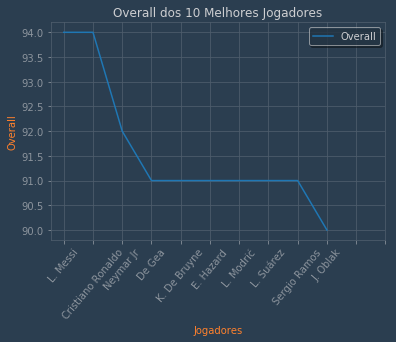

In [5]:
# overall do top 10 jogadores do fifa
fifa_top = fifa.head(10)
nomes = []
nomes = fifa_top['Name'].values
def overall_players(axes = None):
    fifa_top.plot(kind="line" , x="Name", y ="Overall", ax=axes)
    plt.xlabel("Jogadores")
    plt.ylabel("Overall")
    plt.xticks(np.arange(12), nomes[0:], rotation=50)
    plt.grid()
    plt.title("Overall dos 10 Melhores Jogadores", fontsize=12)
overall_players()

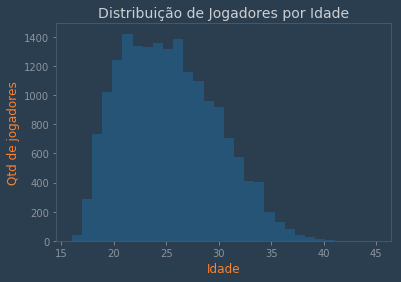

In [6]:
# dist de jogadores por idade
def age_dist(axes = None):
    ax = sns.distplot(fifa['Age'], bins = 30, kde = False, ax = axes)
    ax.set_xlabel(xlabel="Idade", fontsize=12)
    ax.set_ylabel(ylabel='Qtd de jogadores', fontsize=12)
    ax.set_title(label='Distribuição de Jogadores por Idade', fontsize=14)
age_dist()

In [7]:
# verificando os jogadores mais jovens
eldest = fifa.sort_values('Age', ascending = True)[['Name', 'Nationality','Club', 'Age']].head(10)
eldest.set_index('Name', inplace=True)
print(eldest)

                        Nationality             Club  Age
Name                                                     
G. Nugent                   England  Tranmere Rovers   16
J. Olstad                    Norway  Sarpsborg 08 FF   16
H. Massengo                  France        AS Monaco   16
J. Italiano               Australia      Perth Glory   16
N. Ayéva                     Sweden        Örebro SK   16
K. Broda                     Poland     Wisła Kraków   16
L. D'Arrigo               Australia  Adelaide United   16
Y. Verschaeren              Belgium   RSC Anderlecht   16
B. Nygren                    Sweden     IFK Göteborg   16
B. O'Gorman     Republic of Ireland   Bray Wanderers   16


In [8]:
# verificando os jogadores mais velhos
eldest = fifa.sort_values('Age', ascending = False)[['Name', 'Nationality','Club', 'Age', 'Position']].head(10)
eldest.set_index('Name', inplace=True)
print(eldest)

                     Nationality                          Club  Age Position
Name                                                                        
O. Pérez                  Mexico                       Pachuca   45       GK
K. Pilkington            England              Cambridge United   44       GK
T. Warner      Trinidad & Tobago            Accrington Stanley   44       GK
S. Narazaki                Japan                Nagoya Grampus   42       GK
C. Muñoz               Argentina  CD Universidad de Concepción   41       GK
J. Villar               Paraguay                           NaN   41       GK
H. Sulaimani        Saudi Arabia                     Ohod Club   41       LB
M. Tyler                 England           Peterborough United   41       GK
B. Nivet                  France                  ESTAC Troyes   41      CAM
F. Kippe                  Norway                 Lillestrøm SK   40      LCB


In [9]:
# os times com a maior soma de idade (elencos mais 'velhos')
fifa.groupby(['Club'])['Age'].sum().sort_values(ascending = False).head(5)

Club
Cardiff City     863
Villarreal CF    851
Burnley          850
Frosinone        843
Chelsea          832
Name: Age, dtype: int64

In [10]:
# os times com a maior soma de potencial
fifa.groupby(['Club'])['Potential'].sum().sort_values(ascending = False).head(10)

Club
FC Barcelona         2815
Real Madrid          2793
Manchester City      2769
Manchester United    2728
Chelsea              2727
Atlético Madrid      2721
Liverpool            2719
Borussia Dortmund    2719
Tottenham Hotspur    2708
Valencia CF          2688
Name: Potential, dtype: int64

In [11]:
# top 5 canhotos não-goleiros
df1 = fifa[(fifa['Preferred Foot'] == 'Left') & (fifa.Position != 'GK')]
df1[['Name','Overall','Club','Nationality']].head()

,Name,Overall,Club,Nationality
0,L. Messi,94,FC Barcelona,Argentina
13,David Silva,90,Manchester City,Spain
15,P. Dybala,89,Juventus,Argentina
17,A. Griezmann,89,Atlético Madrid,France
24,G. Chiellini,89,Juventus,Italy


In [12]:
# top 5 destros não-goleiros
df1 = fifa[(fifa['Preferred Foot'] == 'Right') & (fifa.Position != 'GK')]
df1[['Name','Overall','Club','Nationality']].head()

,Name,Overall,Club,Nationality
1,Cristiano Ronaldo,94,Juventus,Portugal
2,Neymar Jr,92,Paris Saint-Germain,Brazil
4,K. De Bruyne,91,Manchester City,Belgium
5,E. Hazard,91,Chelsea,Belgium
6,L. Modrić,91,Real Madrid,Croatia


In [13]:
# top 5 canhotos que são goleiros
df1 = fifa[(fifa['Preferred Foot'] == 'Left') & (fifa.Position == 'GK')]
df1[['Name','Overall','Club','Nationality']].head()

,Name,Overall,Club,Nationality
19,T. Courtois,89,Real Madrid,Belgium
37,H. Lloris,88,Tottenham Hotspur,France
57,Ederson,86,Manchester City,Brazil
126,A. Lopes,84,Olympique Lyonnais,Portugal
180,J. Pickford,83,Everton,England


In [14]:
# top 5 destros que são goleiros
df1 = fifa[(fifa['Preferred Foot'] == 'Right') & (fifa.Position == 'GK')]
df1[['Name','Overall','Club','Nationality']].head()

,Name,Overall,Club,Nationality
3,De Gea,91,Manchester United,Spain
9,J. Oblak,90,Atlético Madrid,Slovenia
18,M. ter Stegen,89,FC Barcelona,Germany
22,M. Neuer,89,FC Bayern München,Germany
40,S. Handanovič,88,Inter,Slovenia


In [15]:
# melhor jogador em cada posição
fifa.iloc[fifa.groupby(fifa['Position'])['Overall'].idxmax()][['Name', 'Position','Club','Nationality','Overall']]

,Name,Position,Club,Nationality,Overall
17,A. Griezmann,CAM,Atlético Madrid,France,89
12,D. Godín,CB,Atlético Madrid,Uruguay,90
20,Sergio Busquets,CDM,FC Barcelona,Spain,89
271,Luis Alberto,CF,Lazio,Spain,82
67,Thiago,CM,FC Bayern München,Spain,86
3,De Gea,GK,Manchester United,Spain,91
28,J. Rodríguez,LAM,FC Bayern München,Colombia,88
35,Marcelo,LB,Real Madrid,Brazil,88
24,G. Chiellini,LCB,Juventus,Italy,89
11,T. Kroos,LCM,Real Madrid,Germany,90


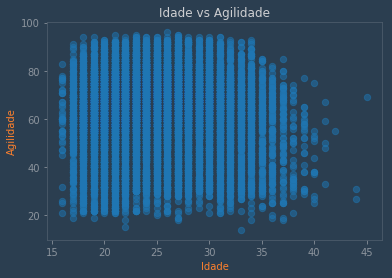

In [16]:
# idade vs agilidade
def age_agility(axes = None):
    fifa.plot(kind="scatter" , x="Age", y ="Agility", alpha=0.5, s = 40, ax=axes)
    plt.xlabel("Idade")
    plt.ylabel("Agilidade")
    plt.title("Idade vs Agilidade", fontsize=12)
age_agility()

In [17]:
# top 5 jogadores acima de 30 anos
df1 = fifa[(fifa['Age'] > 30)]
df1[['Name','Overall','Club','Nationality']].head().sort_values(by='Overall', ascending=False)

,Name,Overall,Club,Nationality
0,L. Messi,94,FC Barcelona,Argentina
1,Cristiano Ronaldo,94,Juventus,Portugal
6,L. Modrić,91,Real Madrid,Croatia
7,L. Suárez,91,FC Barcelona,Uruguay
8,Sergio Ramos,91,Real Madrid,Spain


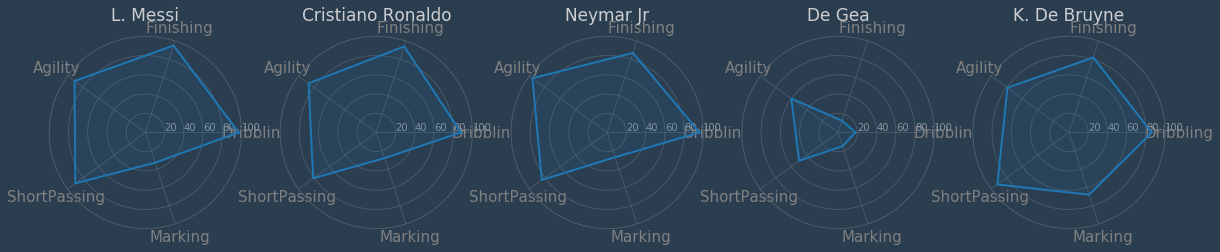

In [18]:
def radar_status(axes = None):
    plt.figure(figsize=(20,20))
    count=0
    # df1 = fifa[(fifa['Nationality'] == 'Argentina')]
    df1 = fifa
    df = df1[['Name', 'Dribbling','Finishing', 'Agility', 'ShortPassing', 'Marking']].head(5)
    # number of variable
    categories=list(df)[1:]
    N = len(categories)

    for item in df.index:
        values=df.loc[item].drop('Name').values.flatten().tolist()
        values += values[:1]
        values

        # angulo (plot / n de var)
        angles = [n / float(N) * 2 * pi for n in range(N)]
        angles += angles[:1]

        # radar
        ax = plt.subplot(1,5,count+1, polar=True)
        count += 1
        
        plt.title(df.loc[item].Name,fontsize=17)
        plt.xticks(angles[:-1], categories, color='grey', size=15)

        # desenha ylabels
        ax.set_rlabel_position(0)
        plt.ylim(0,100)

        # Plot data
        ax.plot(angles, values, linewidth=2, linestyle='solid')

        # area
        ax.fill(angles, values, alpha=0.1)
radar_status()

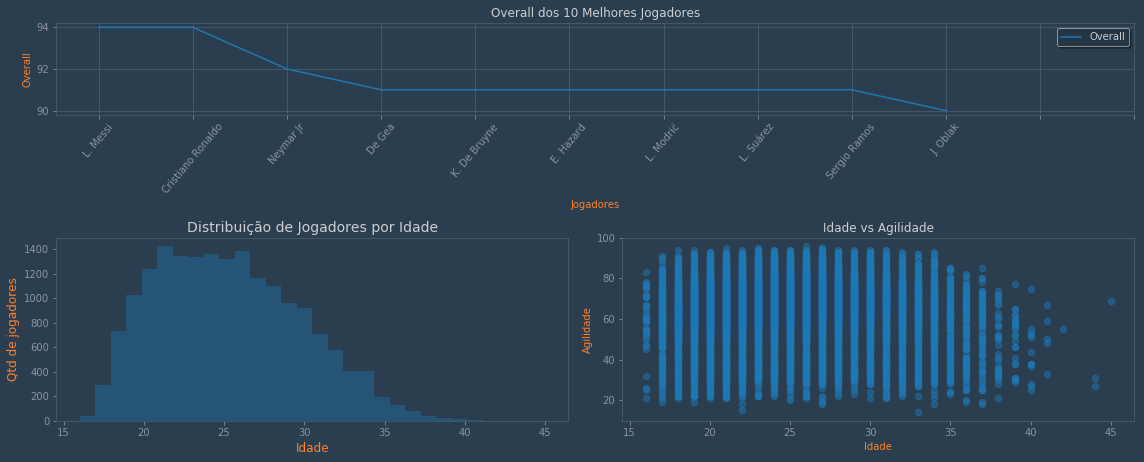

In [19]:
# Construindo as camadas
figure = plt.figure(figsize=(16, 12))
gs_master = mpl.gridspec.GridSpec(4, 2, height_ratios=[2, 4, 2, 2])

# Camada 1 - overall
gs_1 = mpl.gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec = gs_master[0, :])
overall = figure.add_subplot(gs_1[0])
overall_players(overall)

# Camada 2 - plots
gs_31 = mpl.gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec=gs_master[1, :1])
dist_idade_jog = figure.add_subplot(gs_31[0, :])
age_dist(dist_idade_jog)

gs_32 = mpl.gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec=gs_master[1, 1])
idade_agilidade = figure.add_subplot(gs_32[0])
age_agility(axes = idade_agilidade)

# Une as camadas, ainda sem dados
gs_master.tight_layout(figure)
plt.show()